1. O período de oscilação de uma massa, 𝑀, presa a uma mola foi medido para massas diferentes. As medições
efetuadas estão registadas na seguinte tabela:
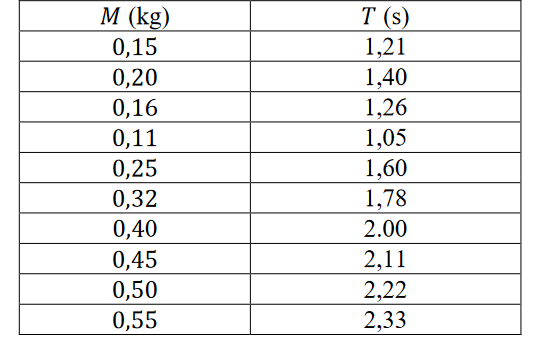

a) Apresente estas medições num gráfico. A analisar o gráfico, a relação ente o período de oscilação e a massa
é linear?


In [4]:
import numpy as np

# Eu escrevi este código mas podem usar o cógio que desenvolveram durante as aulas

class Regression:
    def __init__(self, x_values=None, y_values=None):
        self._x_values = x_values
        self._y_values = y_values
        self._N = len(self._x_values)
        self._sum_xy = None
        self._sum_x = None
        self._sum_y = None
        self._sum_pow_x_2 = None
        self._sum_pow_y_2 = None
        self._slope = None
        self._b_value = None
        self._err_slope = None
        self._err_b_value = None
        self._r_2 = None
        
    def sum_xy(self):
        self._sum_xy = np.sum(self._x_values*self._y_values)
        return self._sum_xy
        
    def sum_x(self):
        self._sum_x = np.sum(self._x_values)
        return self._sum_x
    
    def sum_y(self):
        self._sum_y = np.sum(self._y_values)
        return self._sum_y
    
    def sum_pow_x_2(self):
        self._sum_pow_x_2 = np.sum(self._x_values**2)
        return self._sum_pow_x_2
    
    def sum_pow_y_2(self):
        self._sum_pow_y_2 = np.sum(self._y_values**2)
        return self._sum_pow_y_2
        
    def slope(self):
        self._slope = (self._N*self.sum_xy()-self.sum_x()*self.sum_y())/(self._N*self.sum_pow_x_2()-self.sum_x()**2)
        return self._slope
        
    def b_value(self):
        self._b_value = (self.sum_pow_x_2()* self.sum_y() - self.sum_x()*self.sum_xy())/(self._N*self.sum_pow_x_2()-self.sum_x()**2)
        return self._b_value
    
    def  r_2(self):
        self._r_2 = (self._N*self.sum_xy()-self.sum_x()*self.sum_y())**2/((self._N*self.sum_pow_x_2()-self.sum_x()**2)*(self._N*self.sum_pow_y_2()-self.sum_y()**2))
        return self._r_2
    
    def err_slope(self):        
        self._err_slope = np.abs(self._slope)*np.sqrt(((1/self._r_2)-1)/(self._N-2))
        return self._err_slope
    
    def err_b_value(self):
        self._err_b_value = self._err_slope*np.sqrt(self._sum_pow_x_2/self._N)
        return self._err_b_value
    
    def apply_regression(self):
        self.sum_xy()
        self.sum_x()
        self.sum_y()
        self.sum_pow_x_2()
        self.sum_pow_y_2()
        self.slope()
        self.b_value()
        self.r_2()
        self.err_slope()
        self.err_b_value()
        print("REGRESSION RESULTS")
        print("------------------")
        print("Sum_xy: {}".format(self.sum_xy()))
        print("Sum_x: {}".format(self.sum_x()))
        print("Sum_y: {}".format(self.sum_y()))
        print("sum_pow_x_2: {}".format(self.sum_pow_x_2()))
        print("sum_pow_y_2: {}".format(self.sum_pow_y_2()))
        print("slope (m): {} +- {}".format(self.slope(), self.err_slope()))
        print("b: {} +- {}".format(self.b_value(), self.err_b_value()))
        print("r^2: {}".format(self.r_2()))

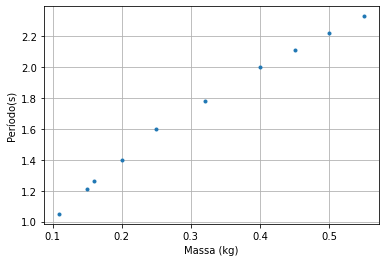

In [5]:
import numpy as np
import matplotlib.pyplot as plt


massa = np.array([0.15, 0.20, 0.16, 0.11, 0.25, 0.32, 0.40, 0.45, 0.50, 0.55])
T = np.array([1.21,1.40,1.26,1.05,1.6,1.78,2.00,2.11,2.22,2.33])

plt.plot(massa, T, ".")
plt.xlabel("Massa (kg)")
plt.ylabel("Período(s)")
plt.grid()

**Ao analisarmos o gráfico podemos verificar que a regressão entre a massa e o período não é linear**

b)Apresente as medições num gráfico log-log. Qual a dependência entre as quantidade período e massa?


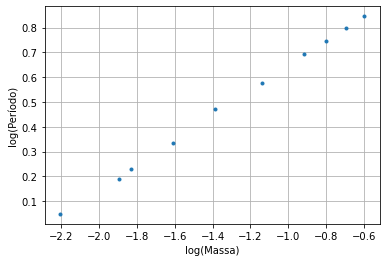

In [6]:
mass_log = np.log(massa)
T_log = np.log(T)

plt.plot(mass_log, T_log, ".")
plt.xlabel("log(Massa)")
plt.ylabel("log(Período)")
plt.grid()

Ao analisarmos o gráfico percebemos que existe uma relação linear entre as duas quantidades quando aplicadas o logaritmo.

Podemos concluir que

$log(T) = n log(m) + log(b)$

sendo T o período, m a massa, n o declive e b a ordenada na origem

i. e. equivalente a:

$log(T) = log(b*m^n)$

aplicando a exponencial aos dois termos  ficamos com

$T = b*m^n$

A expressão anterior permite-nos saber a relação entre o periodo e a massa. E podemos calcular o valor de n ao aplicarmos a regressão linear aos dados apresentados gráfico log-log

REGRESSION RESULTS
------------------
Sum_xy: -5.032803268015572
Sum_x: -13.077925527973761
Sum_y: 4.9368220664221285
sum_pow_x_2: 19.95495987571018
sum_pow_y_2: 3.1482359370224975
slope (m): 0.4991804084444636 +- 0.004257386581882887
b: 1.1465066273082347 +- 0.006014070523054011
r^2: 0.9994184213605939


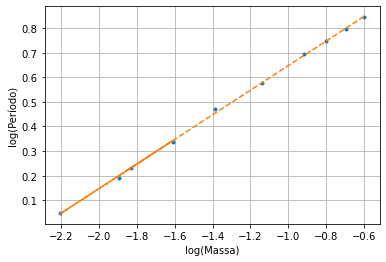

In [8]:
r = Regression(mass_log, T_log)
r.apply_regression()

plt.plot(mass_log, T_log, ".")
plt.plot(mass_log, r.slope()*mass_log+r.b_value(), "--")
plt.xlabel("log(Massa)")
plt.ylabel("log(Período)")
plt.grid()

Concluimos que n~0.5 e
$T = b*m^{0.5}$

c) Considerando a relação entre o período e a massa descoberta na alínea anterior, transforme as quantidades
de modo a obter um gráfico que apresente uma relação linear. Encontre o declive, a ordenada na origem, os
erros respetivos e o coeficiente de determinação. É um bom ajuste?

Tendo os dados anteriores podemos encontrar outra relação linear entre os dados, tendo em conta que já sabemos o valor do expoente da quantidade m.

$T = b*m^{0.5}$

a equação anterior pode ser transformada numa equação de y = mx +b. Tendo em conta que n = 1/2, podemos elevar todas as quandidades da expressão ao quadrado e obtemos

$T^2 = b^2*m$

em $b^2$ é o nosso declive

com esta relação transformamos os dados originais numa relação linear

REGRESSION RESULTS
------------------
Sum_xy: 11.694334000000003
Sum_x: 3.09
Sum_y: 30.652
sum_pow_x_2: 1.1801000000000001
sum_pow_y_2: 115.89680356000002
slope (m): 9.866687380709314 +- 0.07437299419574665
b: 0.016393599360821607 +- 0.025549045006971263
r^2: 0.9995456605779753


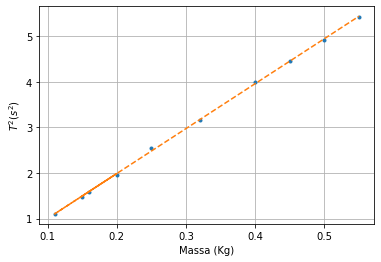

In [10]:
T_2 = T**2
r_2 = Regression(massa, T_2)
r_2.apply_regression()

plt.plot(massa, T_2, ".")
plt.plot(massa, r_2.slope()*massa+r_2.b_value(), "--")
plt.xlabel("Massa (Kg)")
plt.ylabel("$T^2(s^2)$")
plt.grid()

Dado que $r^2$ é muito próximo de 1 podemos concluir que o ajuste é bom.

d) Alínea d resolvida na resolução e-learning